In [14]:
import pandas as pd
# import umap
import umap
import matplotlib.pyplot as plt

import numpy as np

In [15]:
csv_df = pd.read_csv('/Users/swarchol/Research/exemplar-001/quantification/exemplar-001--unmicst_cell.csv')
original_csv_df = pd.read_csv('/Users/swarchol/Research/exemplar-001/quantification/exemplar-001--unmicst_cell.csv')

In [16]:
csv_df.columns

Index(['CellID', 'DNA_6', 'ELANE', 'CD57', 'CD45', 'DNA_7', 'CD11B', 'SMA',
       'CD16', 'DNA_8', 'ECAD', 'FOXP3', 'NCAM', 'X_centroid', 'Y_centroid',
       'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'Solidity', 'Extent', 'Orientation'],
      dtype='object')

In [17]:
# drop columns CellID, X_centroid, Y_centroid
csv_df.drop(
    ["CellID", "X_centroid", "Y_centroid", "DNA_7", "DNA_8"], axis=1, inplace=True
)

In [5]:
csv_df.columns

Index(['DNA_6', 'ELANE', 'CD57', 'CD45', 'CD11B', 'SMA', 'CD16', 'ECAD',
       'FOXP3', 'NCAM'],
      dtype='object')

In [127]:
# log normalize ['DNA_6', 'ELANE', 'CD57', 'CD45', 'DNA_7', 'CD11B', 'SMA', 'CD16',
#        'DNA_8', 'ECAD', 'FOXP3', 'NCAM'
# csv_df[['DNA_6', 'ELANE', 'CD57', 'CD45', 'CD11B', 'SMA', 'CD16', 'ECAD', 'FOXP3', 'NCAM']] = np.log1p(csv_df[['DNA_6', 'ELANE', 'CD57', 'CD45', 'CD11B', 'SMA', 'CD16', 'ECAD', 'FOXP3', 'NCAM']])

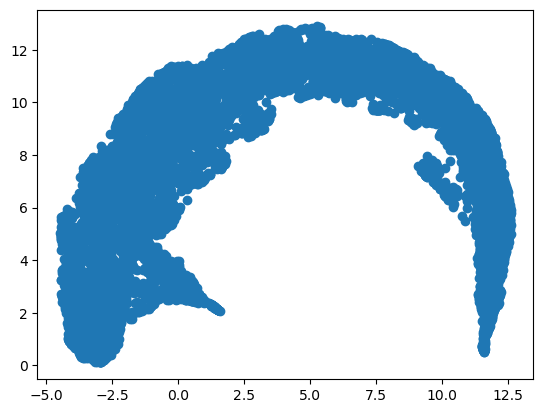

In [23]:
fit = umap.UMAP(n_neighbors=100,
        min_dist=0.1)
embedding = fit.fit_transform(csv_df)
# embedding scatter
plt.scatter(embedding[:, 0], embedding[:, 1])

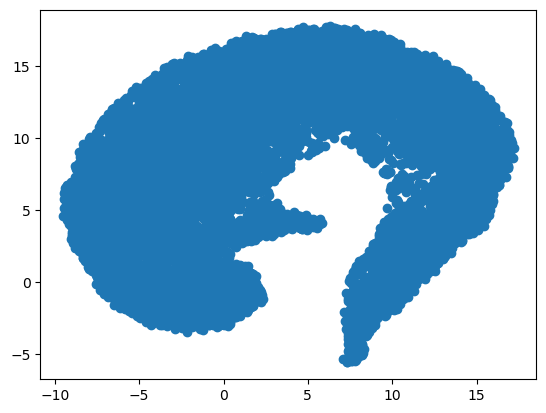

In [24]:
# scale embedding to be in same range as X_centroid / Y_centroid
embedding[:, 0] = embedding[:, 0] - np.min(embedding[:, 0])
embedding[:, 0] = embedding[:, 0] / np.max(embedding[:, 0])
embedding[:, 0] = embedding[:, 0] * np.max(original_csv_df['X_centroid'])
embedding[:, 1] = embedding[:, 1] - np.min(embedding[:, 1])
embedding[:, 1] = embedding[:, 1] / np.max(embedding[:, 1])
embedding[:, 1] = embedding[:, 1] * np.max(original_csv_df['Y_centroid'])


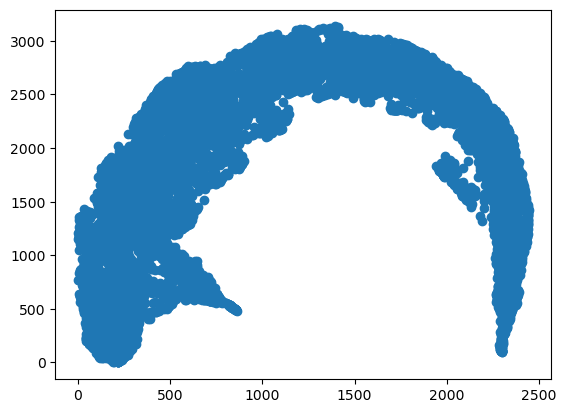

In [25]:
plt.scatter(embedding[:, 0], embedding[:, 1])

In [26]:
original_csv_df['UMAP_X'] = embedding[:, 0]
original_csv_df['UMAP_Y'] = embedding[:, 1]
original_csv_df.to_csv('/Users/swarchol/Research/exemplar-001/quantification/exemplar-001--unmicst_cell_umap_7_22.csv', index=False)